# Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Project folder path
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Python fundamental for Data Analysis\01-2024 Instacart Basket analysis'

In [6]:
path

'C:\\Users\\BhuwanDhakal\\Sunita\\Projects\\2 Data Immersion\\Python fundamental for Data Analysis\\01-2024 Instacart Basket analysis'

In [7]:
# Importing ords_prods_merge Dataframe 
df_ords_prods_merge_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped.pkl'))

In [8]:
ords_prods_merge = df_ords_prods_merge_final

In [9]:
# Checking the Dataframe
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,time_of_day,...,price_range_loc,busiest_day,busiest_days_modified,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


# Create a chart

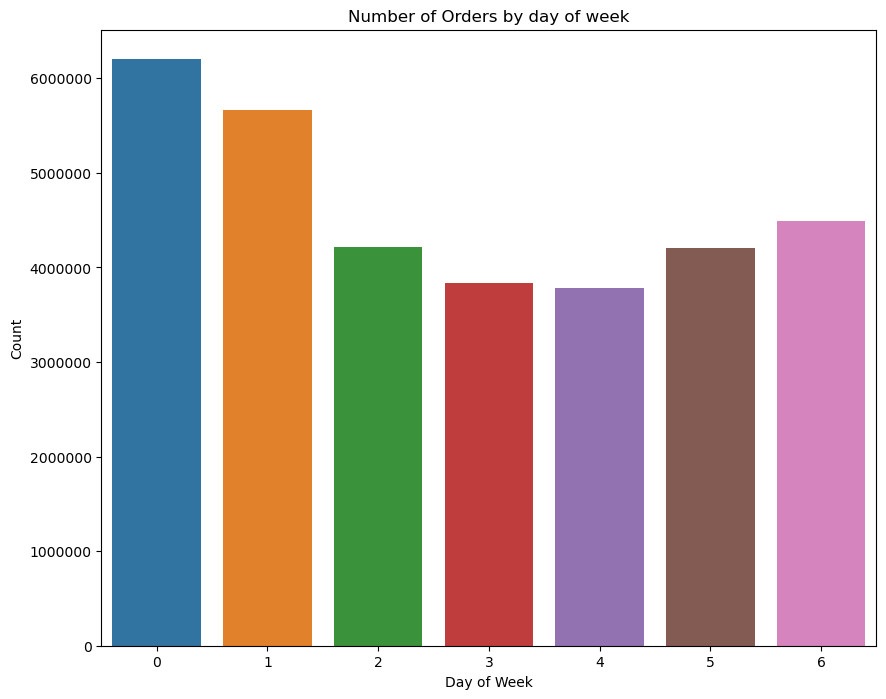

In [10]:
# Create a bar chart

plt.figure(figsize = (10, 8))
barplot = sns.countplot(data = ords_prods_merge, x = 'orders_day_of_week')

plt.title('Number of Orders by day of week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

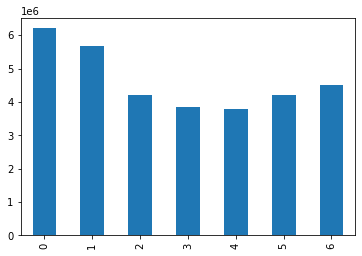

In [9]:
# Sorting the chart by orders_day _of _week
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# Creating the frequencies of orders_day_of_week
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [11]:
# sorting the frequencies of orders_day_of_week
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

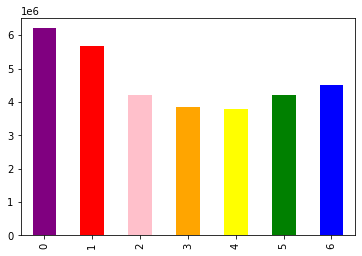

In [12]:
# Adding color in bar chart
bar = df_ords_prods_merge_final['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

# Exporting charts

In [11]:
# Exporting bar chart outside of Jupyter in the form of image file
barplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histogram and Scatterplots

<AxesSubplot:ylabel='Frequency'>

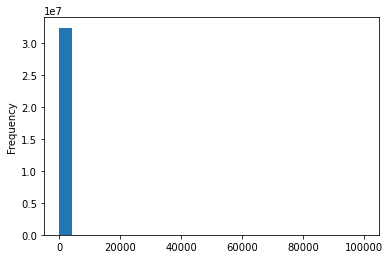

In [14]:
# Creating Histogram of the price column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
# Checking the consistency of prices column
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

## Checking mean, median and mode of prices column

In [16]:
ords_prods_merge['prices'].mean()

11.980225638375474

In [17]:
ords_prods_merge['prices'].median()

7.4

In [18]:
ords_prods_merge['prices'].max()

99999.0

#### max value is 99999 which is result of data corruption and unrealitic. someting is wrong in this column

<AxesSubplot:xlabel='prices', ylabel='prices'>

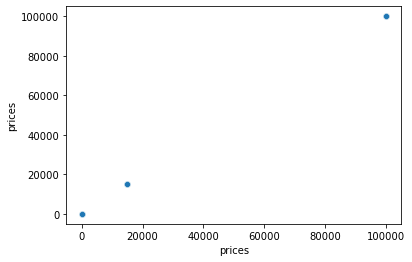

In [19]:
# Creating scatterplot of price column
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [20]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,time_of_day,...,price_range_loc,busiest_day,busiest_days_modified,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [21]:
# marking prices >100 values as nan
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
ords_prods_merge['prices'].max()

25.0

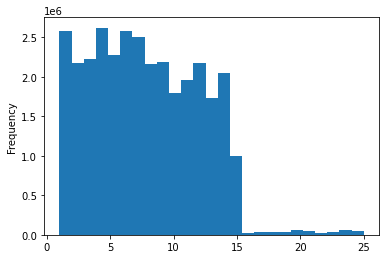

In [23]:
# creating histogram after cleaning data
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

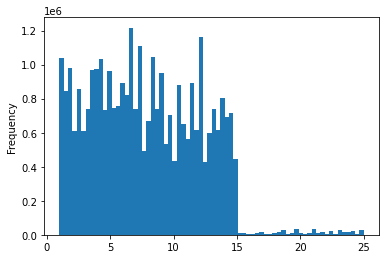

In [24]:
# Increasing number of bins 
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [25]:
# Exporting Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Sampling Data and creating linechart

### Splitting dataframe into two dataframes at a 70/30

In [26]:
# Splitting dataframe into two dataframes at a 70/30
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
 np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [29]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [31]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [32]:
# checking the len of whole Dataframe
len(ords_prods_merge) 

32404859

In [33]:
# checking the len of big and small Dataframe
len(big) + len(small)

32404859

In [34]:
# Creating the new dataframe df_2 for prices and orders_dow
df_2 = small[['orders_day_of_week','prices']]

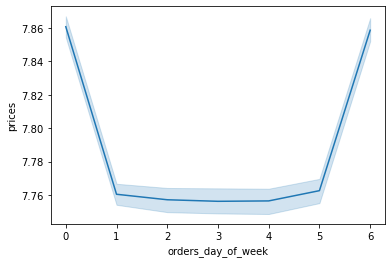

In [35]:
# Creating the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [36]:
# Exporting line Chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_dow.png'))